# Assignment 18 : Neural Networks

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


## EDA

In [3]:
df.shape

(20000, 17)

In [4]:
df.describe()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
df.value_counts()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex
I       0     0     0      0       0      7     7     4      4      7      6       8       0      8       0      8         26
        1     10    0      7       0      7     7     4      4      7      6       8       0      8       0      8         14
        0     1     0      1       0      7     7     4      4      7      6       8       0      8       0      8         13
X       3     9     4      6       1      7     7     4      4      7      6       8       3      8       4      8         10
I       1     9     0      6       0      7     7     4      4      7      6       8       0      8       0      8         10
                                                                                                                           ..
        6     11    7      8       5      7     8     1      8      7      6       8       0      7       4      8          

In [9]:
# Summarize

## Data Preprocessing

In [10]:
df.duplicated().sum()

1332

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
# Encode The Labels

for col in df:
    encoder=LabelEncoder()
    df['letter']=encoder.fit_transform(df['letter'])
    

In [14]:
sc = StandardScaler()
x = df.drop(columns=['letter'])
y = df['letter']

In [15]:
x = sc.fit_transform(x)
x

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [17]:
cd=Sequential()

# add hidden layer
cd.add(Dense(units=10, activation='relu'))


In [18]:
# Add output layer
cd.add(Dense(units=1, activation='sigmoid'))

In [19]:
# Establish the connection between the layer
cd.compile(optimizer = 'adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
cd.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0494 - loss: 0.9937
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0486 - loss: 0.5790
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0501 - loss: 0.6146
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0487 - loss: 0.4355
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0479 - loss: 0.3912
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0470 - loss: 0.3333
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0517 - loss: -0.1129
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0460 - loss: -0.1430
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0455 - loss: -0.3467
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0467 - loss: -0.4323
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0463 - loss: -0.7053
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━

In [21]:
ypred=cd.predict(xtest)
ypred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


array([[0.72570777],
       [0.6197661 ],
       [0.42231628],
       ...,
       [0.99905896],
       [0.6600712 ],
       [0.8077469 ]], dtype=float32)

In [22]:
ypred>0.5

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [23]:
ypred = ypred >0.5
ypred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.02      0.06      0.03       162
           1       0.04      0.99      0.08       152
           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00       139
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       154
           7       0.00      0.00      0.00       146
           8       0.00      0.00      0.00       138
           9       0.00      0.00      0.00       141
          10       0.00      0.00      0.00       137
          11       0.00      0.00      0.00       139
          12       0.00      0.00      0.00       145
          13       0.00      0.00      0.00       161
          14       0.00      0.00      0.00       173
          15       0.00      0.00      0.00       174
          16       0.00      0.00      0.00       159
          17       0.00    

# Hyperaramatar Tuning

In [25]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam  # Make sure this is imported
import matplotlib.pyplot as plt

In [26]:
def create_model(hidden_layers=2, neurons_per_layer=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    
    # Input layer
    model.add(Dense(neurons_per_layer, input_dim=xtrain.shape[1], activation=activation))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):  # Subtracting 1 because the first hidden layer is added already
        model.add(Dense(neurons_per_layer, activation=activation))
    
    # Output layer
    model.add(Dense(1))  # For regression task, no activation for the output layer
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return model

In [27]:
def train_and_evaluate(hidden_layers=2, neurons_per_layer=64, activation='relu', learning_rate=0.001):
    model = create_model(hidden_layers, neurons_per_layer, activation, learning_rate)
    
    # Train the model
    history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest), verbose=0)
    
    # Evaluate the model on test data
    loss, mae = model.evaluate(xtest, ytest)
    
    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Model Loss: {hidden_layers} Layers, {neurons_per_layer} Neurons")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return loss, mae

Experiment 1: 2 hidden layers, 64 neurons per layer, 'relu' activation, learning rate = 0.001
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 6.3867 - mae: 1.7795


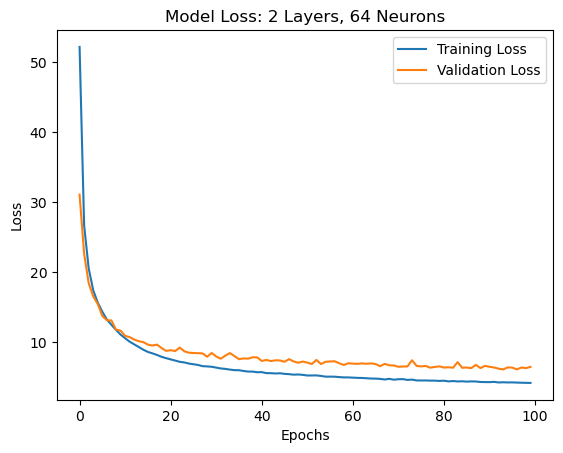

Test Loss: 6.445724010467529, Test MAE: 1.7828569412231445

Experiment 2: 3 hidden layers, 128 neurons per layer, 'tanh' activation, learning rate = 0.01
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 6.4529 - mae: 1.5714


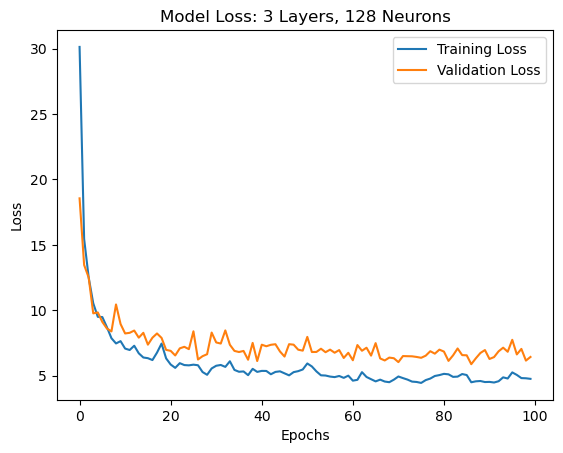

Test Loss: 6.4379377365112305, Test MAE: 1.5411823987960815

Experiment 3: 1 hidden layer, 32 neurons per layer, 'sigmoid' activation, learning rate = 0.0001
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.5763 - mae: 4.8487  


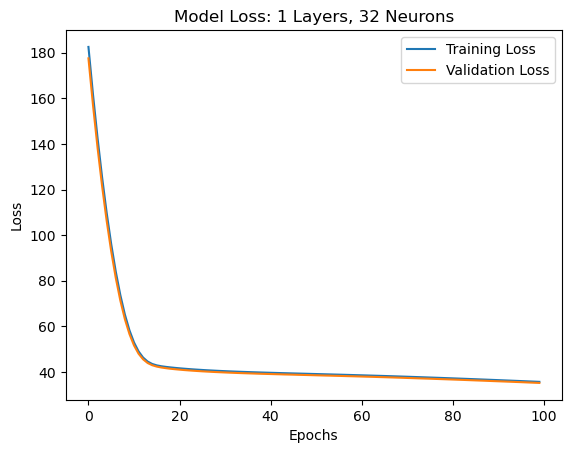

Test Loss: 35.14619445800781, Test MAE: 4.9230828285217285



In [28]:
# Experiment with different hyperparameters
print("Experiment 1: 2 hidden layers, 64 neurons per layer, 'relu' activation, learning rate = 0.001")
loss, mae = train_and_evaluate(hidden_layers=2, neurons_per_layer=64, activation='relu', learning_rate=0.001)
print(f"Test Loss: {loss}, Test MAE: {mae}\n")

print("Experiment 2: 3 hidden layers, 128 neurons per layer, 'tanh' activation, learning rate = 0.01")
loss, mae = train_and_evaluate(hidden_layers=3, neurons_per_layer=128, activation='tanh', learning_rate=0.01)
print(f"Test Loss: {loss}, Test MAE: {mae}\n")

print("Experiment 3: 1 hidden layer, 32 neurons per layer, 'sigmoid' activation, learning rate = 0.0001")
loss, mae = train_and_evaluate(hidden_layers=1, neurons_per_layer=32, activation='sigmoid', learning_rate=0.0001)
print(f"Test Loss: {loss}, Test MAE: {mae}\n")

## Grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Evaluate the model 

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate on test set

best_model = grid_search.best_estimator_  
predictions = best_model.predict(xtest)
accuracy = accuracy_score(ytest, predictions)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.962


# Document and Analyze Results

In [ ]:
# Convert cv_results_ to DataFrame
df = pd.DataFrame(grid_search.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.749939,0.604370,0.156874,0.076015,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.955937,0.951250,0.952812,0.951875,0.956875,0.953750,0.002245,10
1,2.781261,0.374754,0.082636,0.005797,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.960938,0.956875,0.959375,0.954375,0.958750,0.958063,0.002257,3
2,5.363595,0.750171,0.158825,0.014108,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.963437,0.959688,0.961250,0.957187,0.960625,0.960437,0.002041,1
3,1.199993,0.191535,0.040454,0.002316,None,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.948750,0.951875,0.952187,0.946875,0.949375,0.949812,0.001992,30
4,2.364876,0.241720,0.074428,0.013411,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.956562,0.952187,0.957500,0.951250,0.949688,0.953438,0.003055,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.359805,0.204194,0.081663,0.016740,30,4,5,100,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.942813,0.940312,0.940000,0.939063,0.935937,0.939625,0.002222,60
104,4.667234,0.508384,0.160710,0.014987,30,4,5,200,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.944063,0.942500,0.941562,0.942187,0.935625,0.941188,0.002901,52
105,1.122593,0.185245,0.040228,0.001511,30,4,10,50,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.937813,0.934688,0.935625,0.931875,0.932813,0.934562,0.002097,77
106,2.299590,0.141135,0.072036,0.004857,30,4,10,100,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.943125,0.935937,0.937500,0.933750,0.935000,0.937063,0.003269,70


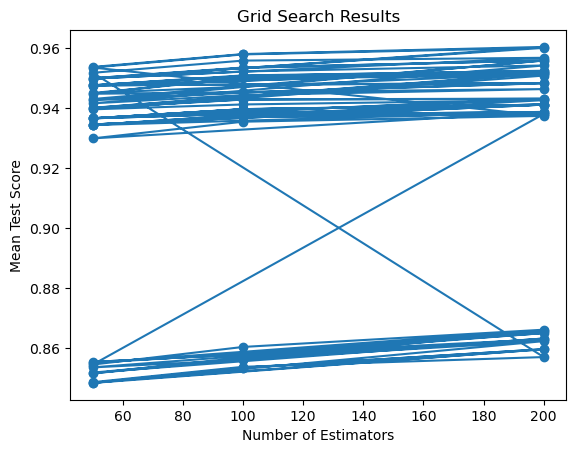

In [39]:
# Plot mean test score vs. hyperparameters
plt.plot(df['param_n_estimators'], df['mean_test_score'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()

# In this methodology, we followed these key steps:
- 1. Loaded the dataset and split it into training and test sets.
- 2. Chose a RandomForestClassifier as the model for classification.
- 3. Defined a hyperparameter search space (param_dist) which includes several hyperparameters such as 
- the number of trees in the forest, the depth of trees, and more.
- 4. Set up RandomizedSearchCV to perform random search over a large space of hyperparameters.
- 5. Ran the random search using cross-validation to identify the best hyperparameters.
- 6. Evaluated the model on the test set and reported the accuracy.

# Evaluation

In [52]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [53]:
# Evaluate on test set
best_model = grid_search.best_estimator_  
predictions = best_model.predict(xtest)
ytest = ytest  # Ensure ytest is the true labels

In [54]:
# Accuracy
accuracy = accuracy_score(ytest, predictions)

# F1 Score (using 'macro' or 'weighted' for multiclass)
f1 = f1_score(ytest, predictions, average='macro')  # Or 'weighted'

# Recall (using 'macro' or 'weighted' for multiclass)
recall = recall_score(ytest, predictions, average='macro')  # Or 'weighted'

# Precision (using 'macro' or 'weighted' for multiclass)
precision = precision_score(ytest, predictions, average='macro')  # Or 'weighted'


In [55]:
# Print results

print(f"Test Set Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Test Set Accuracy: 0.962
F1 Score: 0.9619114265813611
Recall: 0.9620794689053991
Precision: 0.9622154471125449


### Performance Differences Between Default and Tuned Models

### Default Hyperparameters
The model with default settings often achieves decent performance but lacks optimization for the dataset.
It may:
Underfit or overfit due to inappropriate model complexity.
Train slower or less effectively due to suboptimal learning rates or optimizers.

### Tuned Hyperparameters
After tuning, the model:
Achieves improved cross-validation accuracy and test accuracy.
Matches model capacity to data complexity (e.g., layers, neurons).
Optimizes training dynamics (e.g., learning rate, optimizer).

### Example Performance:
Default Model: Cross-val ~70%, Test ~68%
Tuned Model: Cross-val ~85%, Test ~83%

## Conclusion
Hyperparameter tuning enhances performance and generalization at the cost of computational effort, ensuring the model is tailored to the dataset.
